# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from pickle import dump
from pickle import load
%matplotlib inline

# Reading Data Set using Pandas

In [3]:
## Load training set
trainingset= pd.read_csv('trainingData.csv')
trainingset.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
## Load test set
testset= pd.read_csv('validationData.csv')
testset.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


# Preprocess Data

In [4]:
trainingset.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [5]:
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [6]:
testset.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1.111000e+03
mean,98.627363,100.0,99.665167,99.665167,100.0,100.0,100.0,94.297030,90.655266,98.811881,...,99.843384,-7529.197448,4.864902e+06,1.571557,0.758776,0.0,0.0,0.0,11.923492,1.380604e+09
std,16.127245,0.0,7.888265,7.888607,0.0,0.0,0.0,32.148809,39.886991,14.931667,...,5.220261,120.209336,7.027280e+01,1.001828,0.816139,0.0,0.0,0.0,6.556236,5.003222e+05
min,-94.000000,100.0,-87.000000,-88.000000,100.0,100.0,100.0,-99.000000,-96.000000,-98.000000,...,-74.000000,-7695.938755,4.864748e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.379578e+09
25%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7637.423800,4.864843e+06,1.000000,0.000000,0.0,0.0,0.0,9.000000,1.380189e+09
50%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7560.376300,4.864915e+06,1.000000,1.000000,0.0,0.0,0.0,13.000000,1.380873e+09
75%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7420.539659,4.864967e+06,2.000000,1.000000,0.0,0.0,0.0,15.000000,1.380875e+09
max,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7299.786517,4.865017e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381248e+09


In [7]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [31]:
# check for missing values
pd.isnull(trainingset).values.any() 

False

In [32]:
pd.isnull(testset).values.any() 

False

In [30]:
trainingset["BUILDINGID"].unique()

array([1, 0, 2])

In [27]:
# get unique value of floor of each building in trainingset
trainingset.loc[trainingset["BUILDINGID"] == 0]["FLOOR"].unique()

array([0, 2, 1, 3])

In [28]:
trainingset.loc[trainingset["BUILDINGID"] == 1]["FLOOR"].unique()

array([2, 0, 1, 3])

In [29]:
trainingset.loc[trainingset["BUILDINGID"] == 2]["FLOOR"].unique()

array([3, 2, 4, 1, 0])

In [33]:
testset["BUILDINGID"].unique()

array([1, 2, 0])

In [34]:
# get unique value of floor of each building in testset
testset.loc[testset["BUILDINGID"] == 0]["FLOOR"].unique()

array([2, 1, 0, 3])

In [35]:
testset.loc[testset["BUILDINGID"] == 1]["FLOOR"].unique()

array([1, 3, 2, 0])

In [36]:
testset.loc[testset["BUILDINGID"] == 2]["FLOOR"].unique()

array([4, 2, 3, 0, 1])

# Exploratory Data Analysis

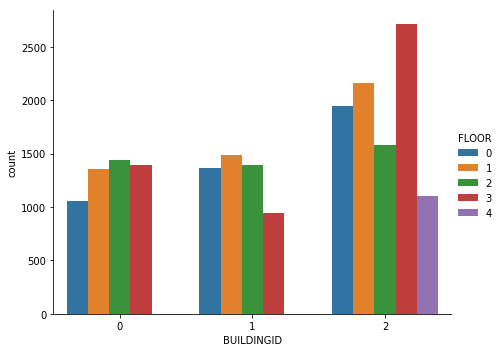

In [41]:
sns.catplot('BUILDINGID', data=trainingset, kind='count', hue='FLOOR',aspect=1.25, height=5)

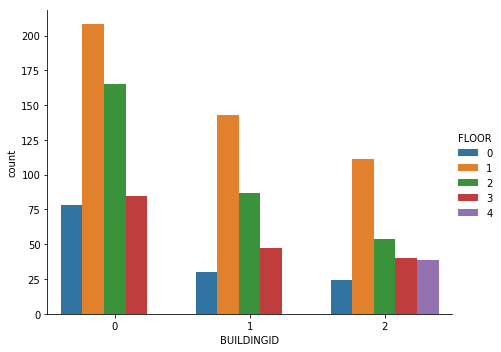

In [42]:
sns.catplot('BUILDINGID', data=testset, kind='count', hue='FLOOR',aspect=1.25, height=5)

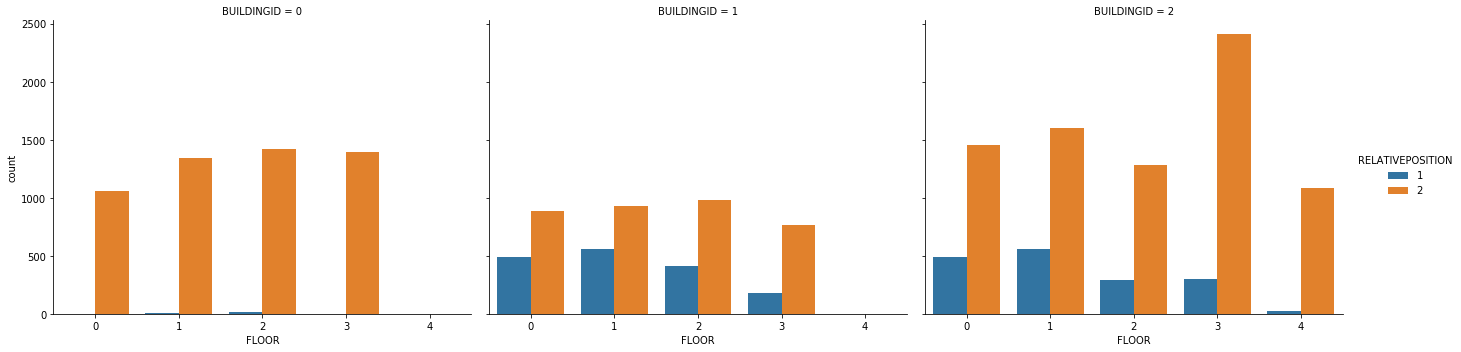

In [44]:
sns.catplot('FLOOR', data=trainingset, kind='count', hue='RELATIVEPOSITION',col='BUILDINGID',aspect=1.25, height=5)

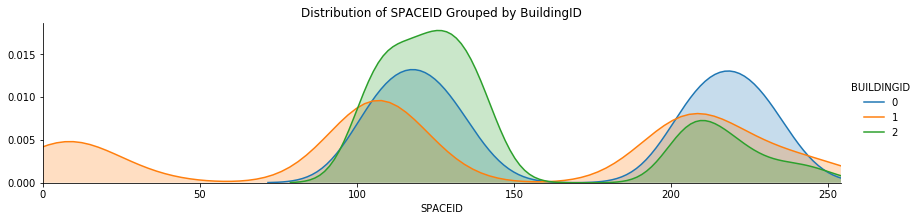

In [51]:
fig = sns.FacetGrid(trainingset, hue='BUILDINGID', aspect=4)
fig.map(sns.kdeplot, 'SPACEID', shade=True)
largest = trainingset['SPACEID'].max()
fig.set(xlim=(0,largest))
fig.set(title='Distribution of SPACEID Grouped by BuildingID')
fig.add_legend()

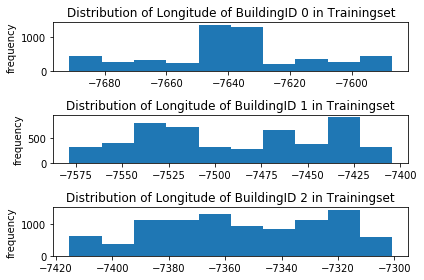

In [56]:
plt.subplot(3,1,1)
plt.hist(trainingset.loc[trainingset["BUILDINGID"] == 0]["LONGITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Longitude of BuildingID 0 in Trainingset')
plt.subplot(3,1,2)
plt.hist(trainingset.loc[trainingset["BUILDINGID"] == 1]["LONGITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Longitude of BuildingID 1 in Trainingset')
plt.subplot(3,1,3)
plt.hist(trainingset.loc[trainingset["BUILDINGID"] == 2]["LONGITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Longitude of BuildingID 2 in Trainingset')
plt.tight_layout()
plt.show()

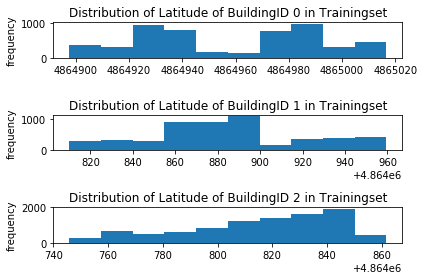

In [57]:
plt.subplot(3,1,1)
plt.hist(trainingset.loc[trainingset["BUILDINGID"] == 0]["LATITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Latitude of BuildingID 0 in Trainingset')
plt.subplot(3,1,2)
plt.hist(trainingset.loc[trainingset["BUILDINGID"] == 1]["LATITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Latitude of BuildingID 1 in Trainingset')
plt.subplot(3,1,3)
plt.hist(trainingset.loc[trainingset["BUILDINGID"] == 2]["LATITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Latitude of BuildingID 2 in Trainingset')
plt.tight_layout()
plt.show()

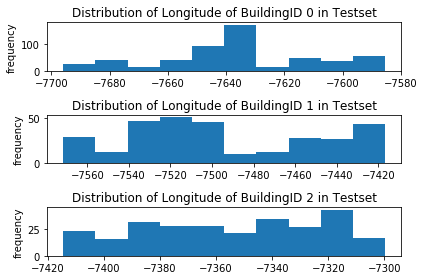

In [58]:
plt.subplot(3,1,1)
plt.hist(testset.loc[testset["BUILDINGID"] == 0]["LONGITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Longitude of BuildingID 0 in Testset')
plt.subplot(3,1,2)
plt.hist(testset.loc[testset["BUILDINGID"] == 1]["LONGITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Longitude of BuildingID 1 in Testset')
plt.subplot(3,1,3)
plt.hist(testset.loc[testset["BUILDINGID"] == 2]["LONGITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Longitude of BuildingID 2 in Testset')
plt.tight_layout()
plt.show()

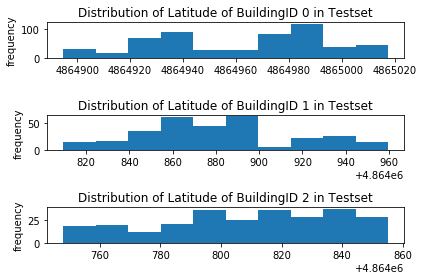

In [59]:
plt.subplot(3,1,1)
plt.hist(testset.loc[testset["BUILDINGID"] == 0]["LATITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Latitude of BuildingID 0 in Testset')
plt.subplot(3,1,2)
plt.hist(testset.loc[testset["BUILDINGID"] == 1]["LATITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Latitude of BuildingID 1 in Testset')
plt.subplot(3,1,3)
plt.hist(testset.loc[testset["BUILDINGID"] == 2]["LATITUDE"])
plt.ylabel('frequency')
plt.title('Distribution of Latitude of BuildingID 2 in Testset')
plt.tight_layout()
plt.show()

# Feature Engineering

In [5]:
# Origanally,from WAP001 to WAP520,Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected. 
# 1 to 105 (weak to strong), 0 for no signal.
trainingset.iloc[:, 0:520]= np.where(trainingset.iloc[:, 0:520] <= 0, 
                trainingset.iloc[:, 0:520] + 105, 
                trainingset.iloc[:, 0:520] - 100)
trainingset.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,0,0,0,0,0,0,0,0,0,...,0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,0,0,0,0,0,0,0,0,0,0,...,0,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,0,0,0,0,0,0,0,8,0,0,...,0,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,0,0,0,0,0,0,0,0,0,0,...,0,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,0,0,0,0,0,0,0,0,0,0,...,0,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
# Origanally,from WAP001 to WAP520,Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected. 
# 1 to 105 (weak to strong), 0 for no signal.
testset.iloc[:, 0:520]= np.where(testset.iloc[:, 0:520] <= 0, 
                testset.iloc[:, 0:520] + 105, 
                testset.iloc[:, 0:520] - 100)
testset.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,0,0,0,0,0,0,0,0,0,...,0,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,0,0,0,0,0,0,0,0,0,0,...,0,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,0,0,0,0,0,0,0,0,0,0,...,0,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,0,0,0,0,0,0,0,0,0,0,...,0,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,0,0,0,0,0,0,0,0,0,0,...,0,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [7]:
concat = pd.concat([trainingset, testset]) 
concat = concat.assign(singleID = (concat['LONGITUDE'].astype(str) + '_' + concat['LATITUDE'].astype(str) + '_' + concat['FLOOR'].astype(str) + '_' + concat['BUILDINGID'].astype(str)))
len(concat["singleID"].unique())

1995

In [8]:
# split concat into trainingset and testset
trainingset=concat.iloc[0:19937, :]
testset=concat.iloc[19937:21048, :]

In [9]:
# Change variable types
trainingset = trainingset.copy()
testset = testset.copy()
trainingset.loc[:,"singleID"] = trainingset.loc[:,"singleID"].astype("category")
testset.loc[:,"singleID"] = testset.loc[:,"singleID"].astype("category")
trainingset.dtypes

WAP001                 int64
WAP002                 int64
WAP003                 int64
WAP004                 int64
WAP005                 int64
WAP006                 int64
WAP007                 int64
WAP008                 int64
WAP009                 int64
WAP010                 int64
WAP011                 int64
WAP012                 int64
WAP013                 int64
WAP014                 int64
WAP015                 int64
WAP016                 int64
WAP017                 int64
WAP018                 int64
WAP019                 int64
WAP020                 int64
WAP021                 int64
WAP022                 int64
WAP023                 int64
WAP024                 int64
WAP025                 int64
WAP026                 int64
WAP027                 int64
WAP028                 int64
WAP029                 int64
WAP030                 int64
                      ...   
WAP501                 int64
WAP502                 int64
WAP503                 int64
WAP504        

# Training Model

In [10]:
X = trainingset.iloc[:, 0:520]
y = trainingset["singleID"] 

KNN

In [11]:
# KNN Algorithm 
import warnings
warnings.filterwarnings("ignore") 
param_grid = {'n_neighbors': [1,5,9],
                       'metric': ['manhattan']}
    
scoring = {'accuracy': 'accuracy',
               'kappa': make_scorer(cohen_kappa_score)}
model = KNeighborsClassifier()   
knn = GridSearchCV(estimator = model,
                        param_grid = param_grid,
                        scoring = scoring,
                        cv = 10,
                        refit = 'accuracy', 
                        return_train_score = True,
                        n_jobs = -1) 
knn_result = knn.fit(X, y)
knn_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [53]:
knn_result.best_score_

0.8180267843707679

In [19]:
knn_result.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
knn_result.cv_results_

{'mean_fit_time': array([18.40725641, 17.75643008, 15.84286313]),
 'std_fit_time': array([1.75981591, 1.62111632, 1.47758679]),
 'mean_score_time': array([115.40550246, 139.02215166, 109.53530085]),
 'std_score_time': array([12.42592694, 38.46167177, 13.52184837]),
 'param_metric': masked_array(data=['manhattan', 'manhattan', 'manhattan'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[1, 5, 9],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'metric': 'manhattan', 'n_neighbors': 1},
  {'metric': 'manhattan', 'n_neighbors': 5},
  {'metric': 'manhattan', 'n_neighbors': 9}],
 'split0_test_accuracy': array([0.71823472, 0.69544132, 0.67555771]),
 'split1_test_accuracy': array([0.74158947, 0.70453437, 0.69429547]),
 'split2_test_accuracy': array([0.8185385 , 0.78813144, 0.7675331 ]),
 'split3_test_accuracy': array([0.81465093, 0.80088496, 0.78318

In [20]:
# save the model to disk
filename = 'knn_model.sav'
dump(knn, open(filename, 'wb'))
# some time later...
# load the model from disk
knn = load(open(filename, 'rb'))

Random Forest

In [11]:
# RandomForest Algorithm 
model = RandomForestClassifier()
param_grid = {'criterion': ['gini'],   
                  'max_features': ['sqrt'],
                  'n_estimators': [100]}
scoring = {'accuracy': 'accuracy',
               'kappa': make_scorer(cohen_kappa_score)}  
rf = GridSearchCV(estimator = model,
                        param_grid = param_grid,
                        scoring = scoring,
                        cv = 10,
                        refit = 'accuracy',
                        n_jobs = -1) 
rf_result = rf.fit(X, y)
rf_result.best_score_   

0.8633696142849977

In [12]:
rf_result.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [13]:
rf_result.cv_results_

{'mean_fit_time': array([68.83937459]),
 'std_fit_time': array([10.85379712]),
 'mean_score_time': array([17.52598968]),
 'std_score_time': array([4.90141597]),
 'param_criterion': masked_array(data=['gini'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini',
   'max_features': 'sqrt',
   'n_estimators': 100}],
 'split0_test_accuracy': array([0.78516004]),
 'split1_test_accuracy': array([0.81033642]),
 'split2_test_accuracy': array([0.86709171]),
 'split3_test_accuracy': array([0.87561455]),
 'split4_test_accuracy': array([0.86469136]),
 'split5_test_accuracy': array([0.79900744]),
 'split6_test_accuracy': array([0.89855072]),
 'split7_test_accuracy': array([0.90497967]

In [14]:
# save the model to disk
filename = 'rf_model.sav'
dump(rf, open(filename, 'wb'))
# some time later...
# load the model from disk
rf = load(open(filename, 'rb'))

Neural Network

In [10]:
# convert integers to dummy variables (i.e. one hot encoded)
X_n = trainingset.iloc[:, 0:520]/105
yc=concat["singleID"]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(yc)
list(encoder.classes_)

['-7299.786516730872_4864818.217352819_1_2',
 '-7300.818990092725_4864817.599367015_0_2',
 '-7303.674135301262_4864812.452149622_0_2',
 '-7303.794295821339_4864812.44148691_1_2',
 '-7304.483600001782_4864820.875299999_0_2',
 '-7307.774300001563_4864814.599399999_0_2',
 '-7308.779111966491_4864804.134827018_1_2',
 '-7308.779111966491_4864804.134827018_2_2',
 '-7308.869500000029_4864814.4614999965_2_2',
 '-7309.219399999826_4864812.245399997_1_2',
 '-7309.219399999826_4864812.2453999985_1_2',
 '-7309.219399999826_4864812.2454_1_2',
 '-7309.324009812239_4864815.039728945_4_2',
 '-7309.517499998212_4864813.293499999_3_2',
 '-7309.517499998212_4864813.293499999_4_2',
 '-7309.62392746803_4864812.3262558_1_2',
 '-7309.849300000817_4864812.695299998_1_2',
 '-7310.02950000018_4864815.141199999_2_2',
 '-7310.057300001383_4864815.156599999_4_2',
 '-7310.299179000072_4864812.098652742_1_2',
 '-7310.4241694986185_4864807.913906318_1_2',
 '-7310.5120571103025_4864812.517017998_1_2',
 '-7310.70086009

In [11]:
encoded_Y = encoder.transform(yc)

In [12]:
list(encoder.inverse_transform([0,1126]))

['-7299.786516730872_4864818.217352819_1_2',
 '-7536.6211999990055_4864934.2251999965_2_1']

In [13]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = keras.utils.to_categorical(encoded_Y, num_classes = 1995)

In [14]:
print(dummy_y.shape)

(21048, 1995)


In [15]:
# split dummy_y into y_trainvalidation and y_test
y_trainval=dummy_y[0:19937, :]
y_test=dummy_y[19937:21048, :]

In [16]:
X_test_n = testset.iloc[:, 0:520] /105

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_n, y_trainval, 
                                                  test_size = 0.2, 
                                                  random_state = 0)

In [89]:
# define model
model = Sequential()
model.add(Dense(1500, input_dim=520,init='uniform', activation='relu'))
model.add(Dense(units = 1995,init='uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1500)              781500    
_________________________________________________________________
dense_8 (Dense)              (None, 1995)              2994495   
Total params: 3,775,995
Trainable params: 3,775,995
Non-trainable params: 0
_________________________________________________________________


In [90]:
# fit model
np.random.seed(0)
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 256,epochs=120)

Train on 15949 samples, validate on 3988 samples
Epoch 1/120
15949/15949 [==============================] - 21s 1ms/step - loss: 5.9820 - acc: 0.0757 - val_loss: 4.0728 - val_acc: 0.1319
Epoch 2/120
15949/15949 [==============================] - 22s 1ms/step - loss: 3.2649 - acc: 0.2215 - val_loss: 2.7471 - val_acc: 0.2768
Epoch 3/120
15949/15949 [==============================] - 21s 1ms/step - loss: 2.4182 - acc: 0.3478 - val_loss: 2.1816 - val_acc: 0.3872
Epoch 4/120
15949/15949 [==============================] - 22s 1ms/step - loss: 1.9723 - acc: 0.4410 - val_loss: 1.8764 - val_acc: 0.4466
Epoch 5/120
15949/15949 [==============================] - 21s 1ms/step - loss: 1.6694 - acc: 0.5194 - val_loss: 1.6558 - val_acc: 0.4950
Epoch 6/120
15949/15949 [==============================] - 20s 1ms/step - loss: 1.4634 - acc: 0.5738 - val_loss: 1.4873 - val_acc: 0.5544
Epoch 7/120
15949/15949 [==============================] - 22s 1ms/step - loss: 1.2960 - acc: 0.6239 - val_loss: 1.3622 - v

Epoch 118/120
15949/15949 [==============================] - 19s 1ms/step - loss: 0.1501 - acc: 0.9557 - val_loss: 0.8236 - val_acc: 0.7939
Epoch 119/120
15949/15949 [==============================] - 19s 1ms/step - loss: 0.1466 - acc: 0.9560 - val_loss: 0.8125 - val_acc: 0.7941
Epoch 120/120
15949/15949 [==============================] - 19s 1ms/step - loss: 0.1452 - acc: 0.9569 - val_loss: 0.8202 - val_acc: 0.8012


In [91]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, val: %.3f' % (train_acc, val_acc))

Train: 0.959, val: 0.801


In [21]:
from keras.models import load_model
 
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing mode
# identical to the previous one
model = load_model('my_model.h5')

# Model Evaluation

KNN

In [162]:
X_test = testset.iloc[:, 0:520] 
ypred = pd.DataFrame({'y_pred': pd.Series(knn.predict(X_test))})
ypred['LONGITUDE']=ypred['y_pred'].map(lambda x:x.split('_')[0])
ypred['LATITUDE']=ypred['y_pred'].map(lambda x:x.split('_')[1])
ypred['FLOOR']=ypred['y_pred'].map(lambda x:x.split('_')[2])
ypred['BUILDINGID']=ypred['y_pred'].map(lambda x:x.split('_')[3])
ypred['LONGITUDE']=ypred['LONGITUDE'].astype("float")
ypred['LATITUDE']=ypred['LATITUDE'].astype("float")
ypred['FLOOR']=ypred['FLOOR'].astype("int")
ypred['BUILDINGID']=ypred['BUILDINGID'].astype("int")
y_pred_loc = ypred.loc[:,['LONGITUDE','LATITUDE']].values 
y_pred_floor = ypred.loc[:, ['FLOOR']].values
y_pred_buildingid = ypred.loc[:, ['BUILDINGID']].values
y_test_loc = testset.loc[:,['LONGITUDE','LATITUDE']].values 
y_test_floor = testset.loc[:, ['FLOOR']].values
y_test_buildingid = testset.loc[:, ['BUILDINGID']].values

In [160]:
building_hitrate = np.mean(y_test_buildingid == y_pred_buildingid)
floor_hitrate = np.mean(y_test_floor == y_pred_floor)
print(building_hitrate,floor_hitrate)

0.9864986498649865 0.8802880288028803


In [163]:
def euclidean_distance(y_test_loc, y_pred_loc):    
    error = np.sum(np.square(y_test_loc - y_pred_loc), axis = 1)**0.5  
    return error   

In [164]:
error=euclidean_distance(y_test_loc, y_pred_loc):    
mean_error = np.mean(error)

12.393613427519973


In [165]:
percentile_25 = np.percentile(error, 25)
percentile_50 = np.percentile(error, 50)
percentile_75 = np.percentile(error, 75)
percentile_95 = np.percentile(error, 95)
percentile_100= np.percentile(error, 100)
print(percentile_25,percentile_50,percentile_75,percentile_95,percentile_100)

1.8837855979914389 6.016710905535766 12.307868836061816 37.31410362949056 369.1583360993148


Random Forest

In [15]:
X_test = testset.iloc[:, 0:520] 
ypred = pd.DataFrame({'y_pred': pd.Series(rf.predict(X_test))})
ypred['LONGITUDE']=ypred['y_pred'].map(lambda x:x.split('_')[0])
ypred['LATITUDE']=ypred['y_pred'].map(lambda x:x.split('_')[1])
ypred['FLOOR']=ypred['y_pred'].map(lambda x:x.split('_')[2])
ypred['BUILDINGID']=ypred['y_pred'].map(lambda x:x.split('_')[3])
ypred['LONGITUDE']=ypred['LONGITUDE'].astype("float")
ypred['LATITUDE']=ypred['LATITUDE'].astype("float")
ypred['FLOOR']=ypred['FLOOR'].astype("int")
ypred['BUILDINGID']=ypred['BUILDINGID'].astype("int")
y_pred_loc = ypred.loc[:,['LONGITUDE','LATITUDE']].values 
y_pred_floor = ypred.loc[:, ['FLOOR']].values
y_pred_buildingid = ypred.loc[:, ['BUILDINGID']].values
y_test_loc = testset.loc[:,['LONGITUDE','LATITUDE']].values 
y_test_floor = testset.loc[:, ['FLOOR']].values
y_test_buildingid = testset.loc[:, ['BUILDINGID']].values

In [16]:
building_hitrate = np.mean(y_test_buildingid == y_pred_buildingid)
floor_hitrate = np.mean(y_test_floor == y_pred_floor)
print(building_hitrate,floor_hitrate)

0.9990999099909991 0.900990099009901


In [17]:
def euclidean_distance(y_test_loc, y_pred_loc):    
    error = np.sum(np.square(y_test_loc - y_pred_loc), axis = 1)**0.5  
    return error  

In [22]:
error=euclidean_distance(y_test_loc, y_pred_loc)    
mean_error = np.mean(error)
print(mean_error)

8.313378246388035


In [21]:
percentile_25 = np.percentile(error, 25)
percentile_50 = np.percentile(error, 50)
percentile_75 = np.percentile(error, 75)
percentile_95 = np.percentile(error, 95)
percentile_100= np.percentile(error, 100)
print(percentile_25,percentile_50,percentile_75,percentile_95,percentile_100)

1.2680816338429168 5.126901326604645 10.710873118714298 27.515942452496976 112.14362143818516


Neural Network

In [92]:
# test set performance
y_pred = np.argmax(model.predict(X_test_n), axis = 1)
print(y_pred)

[1063  526  409 ... 1552 1627 1552]


In [94]:
nn_pred=list(encoder.inverse_transform([i]) for i in y_pred)
ypred=pd.DataFrame(list(map(np.ravel, nn_pred)),columns=['y_pred'])
ypred.head()

,y_pred
0,-7524.3513000011435_4864934.490199998_3_1
1,-7385.526399999857_4864838.958999999_4_2
2,-7370.0106999985865_4864847.7535_4_2
3,-7359.148499999195_4864841.7271_4_2
4,-7641.3297999985525_4864920.629500002_2_0


In [95]:
ypred['LONGITUDE']=ypred['y_pred'].map(lambda x:x.split('_')[0])
ypred['LATITUDE']=ypred['y_pred'].map(lambda x:x.split('_')[1])
ypred['FLOOR']=ypred['y_pred'].map(lambda x:x.split('_')[2])
ypred['BUILDINGID']=ypred['y_pred'].map(lambda x:x.split('_')[3])
ypred['LONGITUDE']=ypred['LONGITUDE'].astype("float")
ypred['LATITUDE']=ypred['LATITUDE'].astype("float")
ypred['FLOOR']=ypred['FLOOR'].astype("int")
ypred['BUILDINGID']=ypred['BUILDINGID'].astype("int")
y_pred_loc = ypred.loc[:,['LONGITUDE','LATITUDE']].values 
y_pred_floor = ypred.loc[:, ['FLOOR']].values
y_pred_buildingid = ypred.loc[:, ['BUILDINGID']].values
y_test_loc = testset.loc[:,['LONGITUDE','LATITUDE']].values 
y_test_floor = testset.loc[:, ['FLOOR']].values
y_test_buildingid = testset.loc[:, ['BUILDINGID']].values

In [96]:
building_hitrate = np.mean(y_test_buildingid == y_pred_buildingid)
floor_hitrate = np.mean(y_test_floor == y_pred_floor)
print(building_hitrate,floor_hitrate)

0.9972997299729973 0.8766876687668766


In [97]:
def euclidean_distance(y_test_loc, y_pred_loc):    
    error = np.sum(np.square(y_test_loc - y_pred_loc), axis = 1)**0.5  
    return error  

In [98]:
error=euclidean_distance(y_test_loc, y_pred_loc)    
mean_error = np.mean(error)
print(mean_error)

9.774307387225042


In [99]:
percentile_25 = np.percentile(error, 25)
percentile_50 = np.percentile(error, 50)
percentile_75 = np.percentile(error, 75)
percentile_95 = np.percentile(error, 95)
percentile_100= np.percentile(error, 100)
print(percentile_25,percentile_50,percentile_75,percentile_95,percentile_100)

1.7085753726985318 5.831047595911562 12.507232643290433 32.84909656908328 320.808849941059
